In [3]:
import numpy as np
from collections import defaultdict

class MultinomialNaiveBayes:
    def fit(self, X, y):
        '''
        X: numpy array of shape (n_samples, n_features), where values are counts (non-negative integers)
        y: numpy array of shape (n_samples,)
        '''
        self.classes = np.unique(y)
        self.class_priors = {}
        self.feature_log_probs = {}

        for c in self.classes:
            X_c = X[y == c]
            # Laplace smoothing: add 1 to counts
            class_total = X_c.sum(axis=0) + 1
            total_count = class_total.sum()

            self.feature_log_probs[c] = np.log(class_total / total_count)
            self.class_priors[c] = np.log(X_c.shape[0] / X.shape[0])

    def _predict(self, x):
        class_scores = {}
        for c in self.classes:
            # log(P(class)) + sum(log(P(feature_i|class)) * x_i)
            log_prob = self.class_priors[c] + np.sum(self.feature_log_probs[c] * x)
            class_scores[c] = log_prob
        return max(class_scores, key=class_scores.get)

    def predict(self, X):
        return np.array([self._predict(x) for x in X])


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample dataset
texts = [
    "Buy cheap meds now",
    "Limited offer just for you",
    "Hey, are we still on for dinner?",
    "Win a free iPhone today",
    "Hi mom, I’ll call later",
    "Congratulations! You've won",
    "Let's catch up tomorrow",
]
labels = [1, 1, 0, 1, 0, 1, 0]  # 1: spam, 0: not spam

# Convert to feature matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()
y = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and predict
model = MultinomialNaiveBayes()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6666666666666666


In [7]:
import numpy as np
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# --- Multinomial Naive Bayes Implementation ---
class MultinomialNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = {}
        self.feature_log_probs = {}

        for c in self.classes:
            X_c = X[y == c]
            class_total = X_c.sum(axis=0) + 1  # Laplace smoothing
            total_count = class_total.sum()

            self.feature_log_probs[c] = np.log(class_total / total_count)
            self.class_priors[c] = np.log(X_c.shape[0] / X.shape[0])

    def _predict(self, x):
        class_scores = {}
        for c in self.classes:
            log_prob = self.class_priors[c] + np.sum(self.feature_log_probs[c] * x)
            class_scores[c] = log_prob
        return max(class_scores, key=class_scores.get)

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

# --- Sample Dataset ---
texts = [
    "Buy cheap meds now",
    "Limited offer just for you",
    "Hey, are we still on for dinner?",
    "Win a free iPhone today",
    "Hi mom, I’ll call later",
    "Congratulations! You've won",
    "Let's catch up tomorrow",
]
labels = [1, 1, 0, 1, 0, 1, 0]  # 1 = spam, 0 = not spam

# --- Vectorize Text ---
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()
y = np.array(labels)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train and Evaluate Model ---
model = MultinomialNaiveBayes()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Print Results ---
print("Predictions:", y_pred)
print("Ground Truth:", y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Predictions: [1 0 1]
Ground Truth: [1 1 1]
Accuracy: 0.6666666666666666


In [10]:
#@title 1. Import Necessary Libraries
# You can run this cell by clicking the play button on the left.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries imported successfully!")

Libraries imported successfully!


--- Model Evaluation ---
Accuracy: 0.5000
Precision: 1.0000
Recall: 0.5000
F1-Score: 0.6667


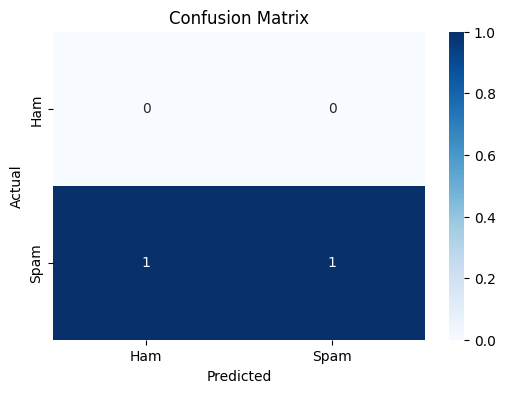


--- Testing with Custom Messages ---
'Congratulations! You've won a free iPhone. Click this link now!' is classified as: Spam
'Hey, let's meet up for coffee tomorrow.' is classified as: Ham
'Your bank account has been compromised. Verify your details immediately.' is classified as: Ham
'rob the bank.' is classified as: Spam


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Dataset
# You can use a publicly available dataset, e.g., the SMS Spam Collection dataset.
# For Colab, you might need to upload it or fetch it from a URL.
# Example: If you have 'spam.csv' uploaded to your Colab environment:
# df = pd.read_csv('spam.csv', encoding='latin-1') # Adjust encoding if needed
# A common format for this dataset has two columns: 'v1' for label and 'v2' for message.
# Let's create a dummy dataset for demonstration if you don't have a file ready:
data = {
    'label': ['ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham'],
    'message': [
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat?',
        'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075 fordetails',
        'U dun say so early hor... U c already then say...',
        'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
        'Nah I don\'t think he goes to usf, he lives around here though',
        'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
        'I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.',
        'I HAVE A DATE ON SUNDAY WITH WILL!!',
        'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days/wk, TsandCs apply Reply HL 4 info',
        'As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune'
    ]
}
df = pd.DataFrame(data)

# Rename columns for clarity
df.columns = ['Category', 'Message']

# 2. Preprocess the Data
# Convert labels to numerical format (0 for ham, 1 for spam)
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# 3. Split Data into Training and Testing Sets
X = df['Message']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Text Vectorization (Feature Extraction)
# Use CountVectorizer to convert text messages into numerical feature vectors (word counts).
# This creates a "bag-of-words" model.
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test) # Use transform, not fit_transform, on test data

# You can inspect the vocabulary and shape of the vectors
# print(vectorizer.get_feature_names_out())
# print(X_train_vectors.shape)

# 5. Train the Multinomial Naive Bayes Model
# alpha=1.0 applies Laplace smoothing
mnb_classifier = MultinomialNB(alpha=1.0)
mnb_classifier.fit(X_train_vectors, y_train)

# 6. Make Predictions
y_pred = mnb_classifier.predict(X_test_vectors)

# 7. Evaluate the Model
print("--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 8. Test with New Messages
def predict_spam(message):
    message_vector = vectorizer.transform([message])
    prediction = mnb_classifier.predict(message_vector)
    return "Spam" if prediction[0] == 1 else "Ham"

print("\n--- Testing with Custom Messages ---")
test_message1 = "Congratulations! You've won a free iPhone. Click this link now!"
print(f"'{test_message1}' is classified as: {predict_spam(test_message1)}")

test_message2 = "Hey, let's meet up for coffee tomorrow."
print(f"'{test_message2}' is classified as: {predict_spam(test_message2)}")

test_message3 = "Your bank account has been compromised. Verify your details immediately."
print(f"'{test_message3}' is classified as: {predict_spam(test_message3)}")

test_message3 = "rob the bank."
print(f"'{test_message3}' is classified as: {predict_spam(test_message3)}")

In [16]:
import pandas as pd

# Sample data: 1 for spam, 0 for not spam (ham)
data = {'message': ['Free prize money!', 'Meeting with the team tomorrow', 'URGENT: claim your prize now', 'Project discussion at 10am', 'Exclusive offer just for you'],
        'label': [1, 0, 1, 0, 1]}

df = pd.DataFrame(data)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [19]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test_counts)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0

Confusion Matrix:
 [[0 1]
 [0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/home/ashik/Music/RU-CSE 4.2/RU_CSE_4.2/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ashik/Music/RU-CSE 4.2/RU_CSE_4.2/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ashik/Music/RU-CSE 4.2/RU_CSE_4.2/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
new_emails = ["Congratulations! You've won a free vacation.", "Reminder: Team lunch"]
new_emails_counts = vectorizer.transform(new_emails)
predictions = clf.predict(new_emails_counts)

for email, prediction in zip(new_emails, predictions):
    print(f"'{email}' is classified as: {'Spam' if prediction == 1 else 'Not Spam'}")

'Congratulations! You've won a free vacation.' is classified as: Spam
'Reminder: Team lunch at 12pm today' is classified as: Spam
